# UNIDAD 2 - PROYECTO: EDA + REGRESIÓN + PRUEBAS DE HIPÓTESIS 

## Nombre del estudiante: ALAN OMAR TAPIA CERVANTES
## Número de control: 19120243

# ETAPA 1: Exploración de los datos.

## Paso 1: Cargue el dataset ("Retrasos.csv") en un dataframe, muestre información básica, enliste las columnas numéricas y las columnas objeto.

In [12]:
# Espacio para realizar la importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
ubicacionArchivo = "retrasos.csv"
# Carga de un CSV a un archivo tipo DataFrame por medio de pandas.
df = pd.read_csv(ubicacionArchivo)

## Paso 2: Haga conteo de datos nulos (ordene de forma descendente); de las variables numéricas, muestre datos estadísticos; de las variables de tipo objeto, determine cuáles sí son factibles para convertir en categóricas y el porqué.

In [14]:
# Mostramos la informacion del dataSet
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   int64  
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [15]:
# Contabilizamos los valores nulos por columna
df.isnull().sum().sort_values(ascending=False)

unit_cost                   983
dosage                      409
line_item_insurance_usd      34
freight_cost_groups          14
freight_cost_usd             14
fulfill_via                   0
unit_of_measure_per_pack      0
weight_kilograms              0
first_line_designation        0
manufacturing_site            0
managed_by                    0
unit_price                    0
pack_price                    0
line_item_value               0
line_item_quantity            0
dosage_form                   0
vendor_inco_term              0
country                       0
brand                         0
molecule_test_type            0
item_description              0
vendor                        0
sub_classification            0
product_group                 0
late                          0
late_delivery                 0
shipment_mode                 0
id                            0
dtype: int64

In [16]:
# sacamos los datos estadisticos de las variables numericas
display(df.describe())

,id,late_delivery,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,unit_cost,weight_kilograms,freight_cost_usd,line_item_insurance_usd
count,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,17.000000,1000.000000,986.000000,966.000000
mean,39239.957000,0.06100,78.675000,15923.379000,1.542272e+05,36.570830,1.094050,0.302294,1947.682000,10896.676856,245.143209
std,24878.296938,0.23945,91.124569,37793.936877,2.160517e+05,47.611183,3.356263,0.351540,3125.348148,14267.588869,357.305275
min,1.000000,0.00000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,30.000000,0.000000
25%,17055.000000,0.00000,30.000000,600.000000,1.181160e+04,6.497500,0.110000,0.050000,162.750000,1946.497500,16.845000
50%,38283.500000,0.00000,60.000000,2992.000000,6.360000e+04,21.000000,0.380000,0.120000,909.000000,5806.750000,100.700000
75%,62036.500000,0.00000,100.000000,11733.000000,2.178262e+05,70.000000,0.890000,0.500000,2526.000000,14821.792500,330.000000
max,82105.000000,1.00000,1000.000000,515000.000000,2.458454e+06,400.000000,24.500000,1.100000,38681.000000,161962.320000,3446.750000


In [17]:
# Obtenemos las columnas de tipo objeto
columnas = df.select_dtypes(include=['object']).columns

# Muestramos los valores únicos que pueden tomar las columnas de tipo objeto
for col in columnas:
    print("valores",col,df[col].nunique())

valores country 31
valores managed_by 1
valores fulfill_via 1
valores vendor_inco_term 5
valores shipment_mode 3
valores late 2
valores product_group 4
valores sub_classification 6
valores vendor 36
valores item_description 105
valores molecule_test_type 62
valores brand 33
valores dosage 41
valores dosage_form 15
valores manufacturing_site 50
valores first_line_designation 1
valores freight_cost_groups 2


Analizando las columnas llegamos a la conclusión que son posibles a categorizar todas las que sus posibles valores son menores o igual a 50 ya que eso representa el 5% en funcion a la catidad de filas.

## Paso 3: Identifique si las columnas numéricas cuentan con anomalías, para ello puede apoyarse de gráficos; identifique si las columnas objeto tienen inconsistencias, para ello puede apoyarse de gráficos.

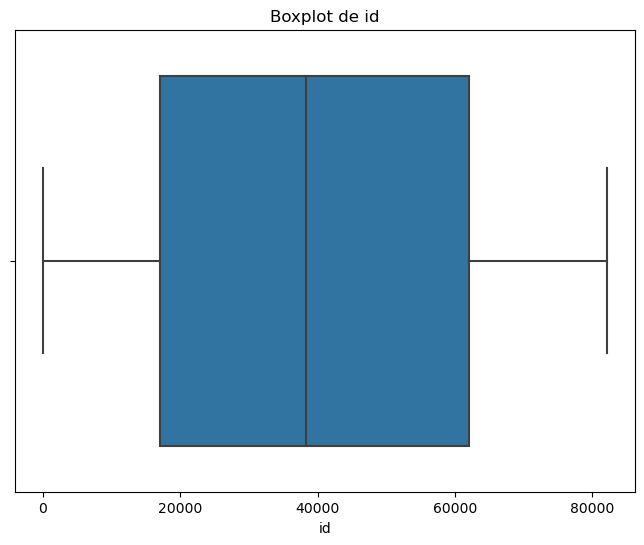

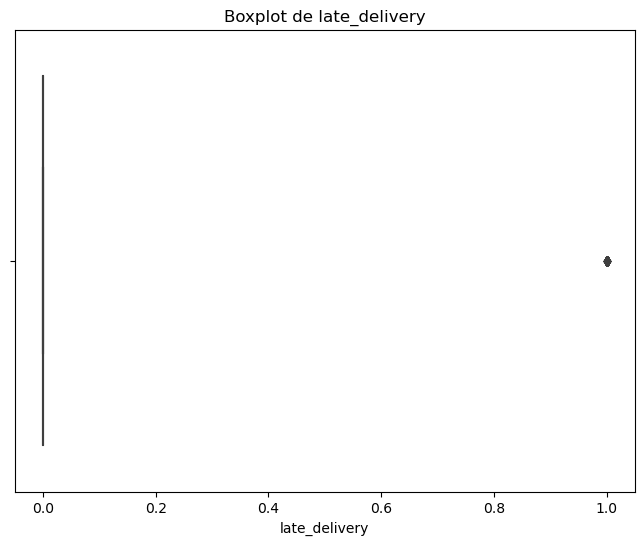

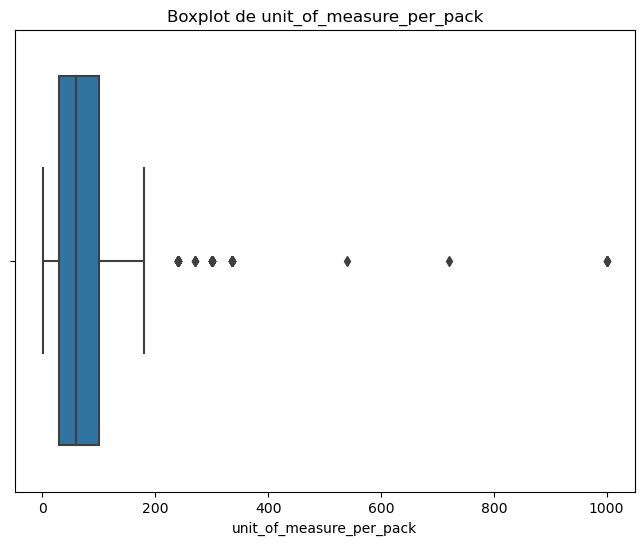

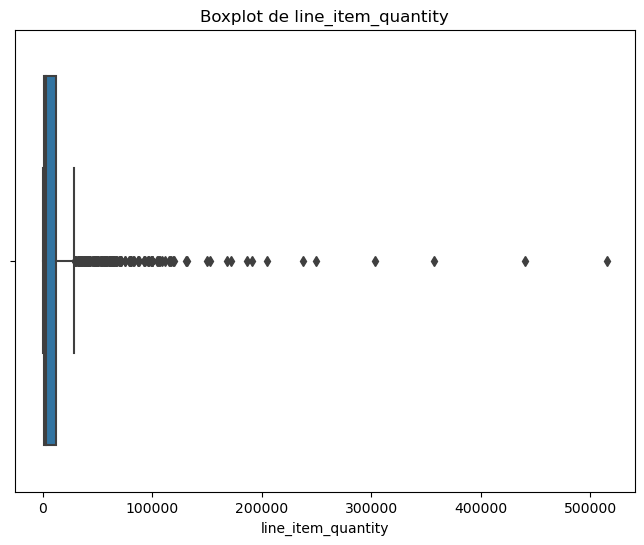

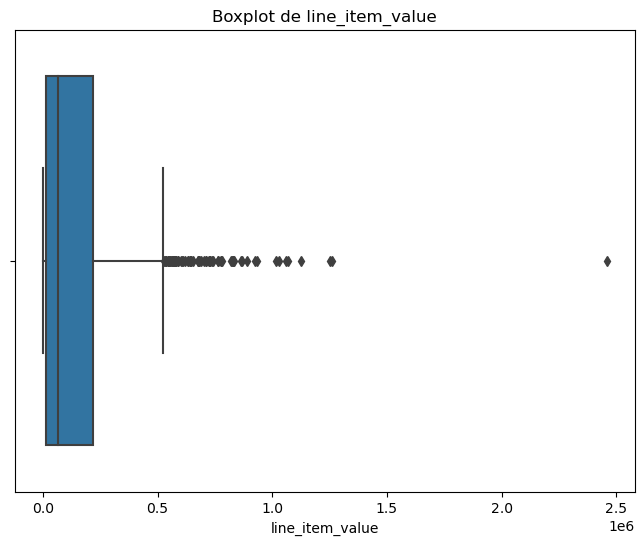

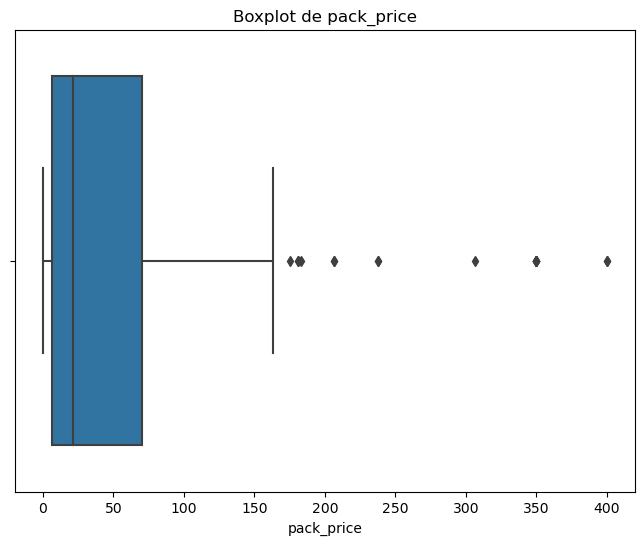

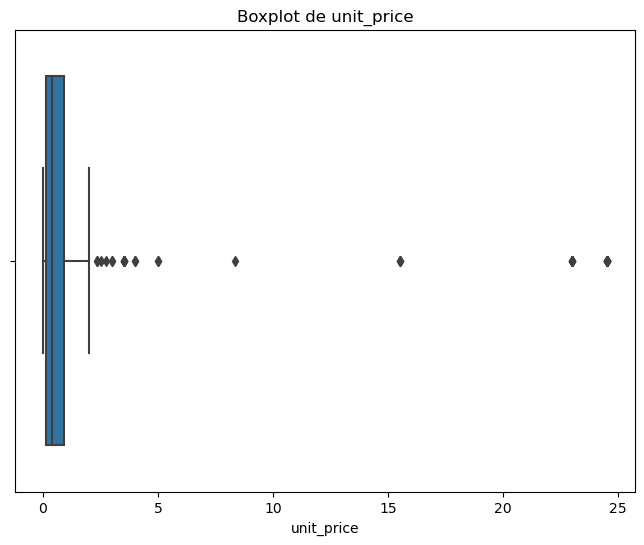

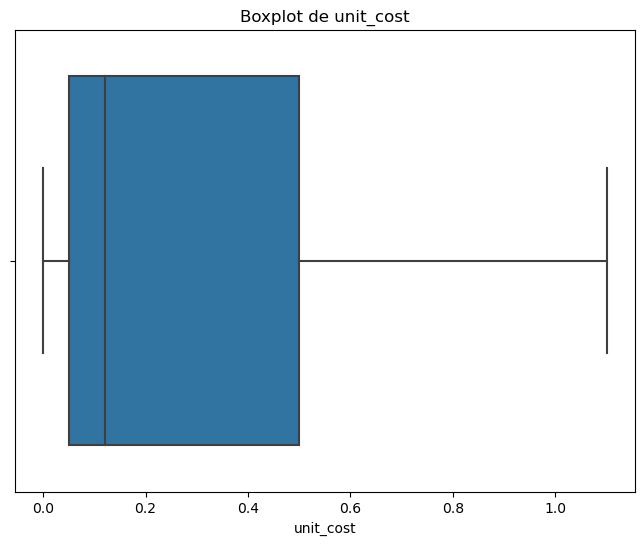

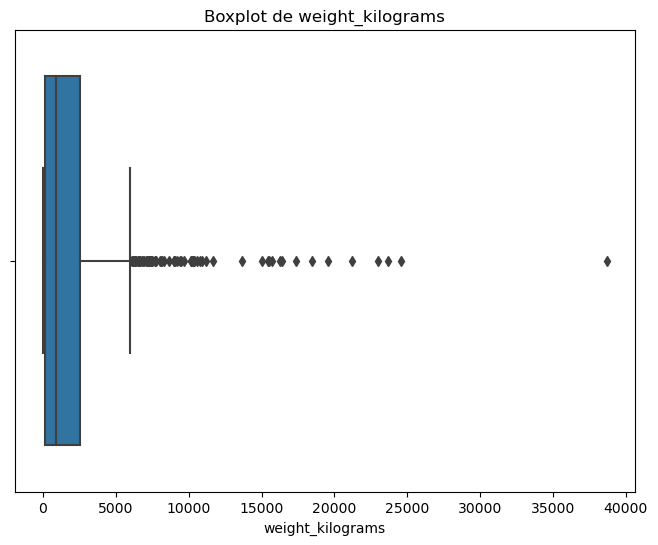

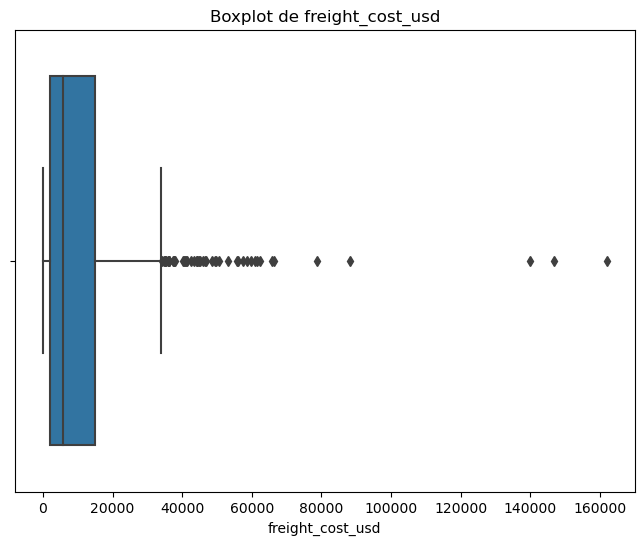

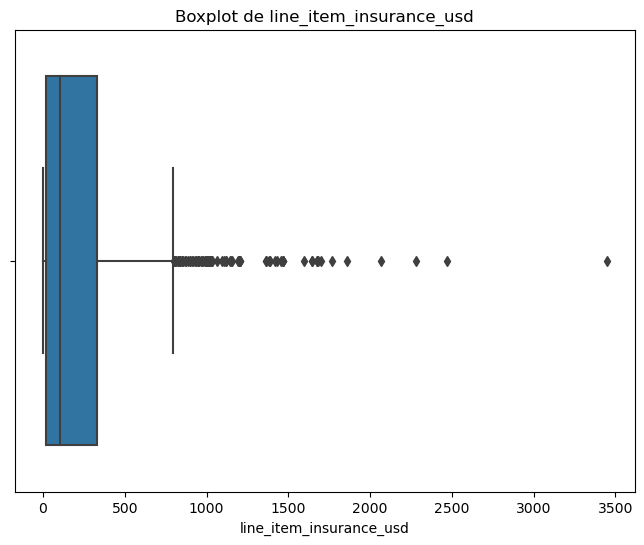

In [18]:
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Crear boxplot para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

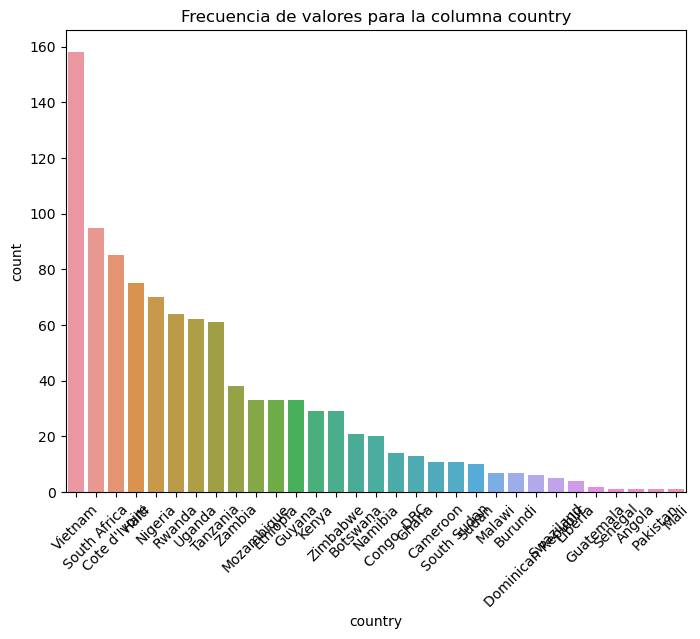

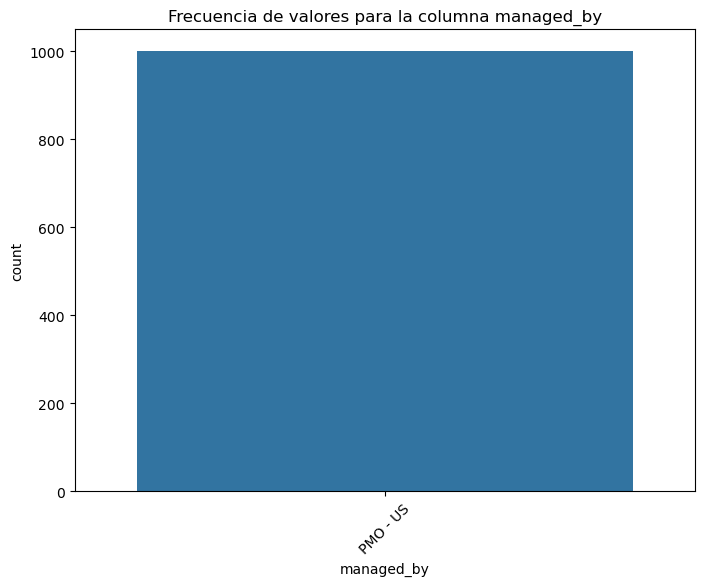

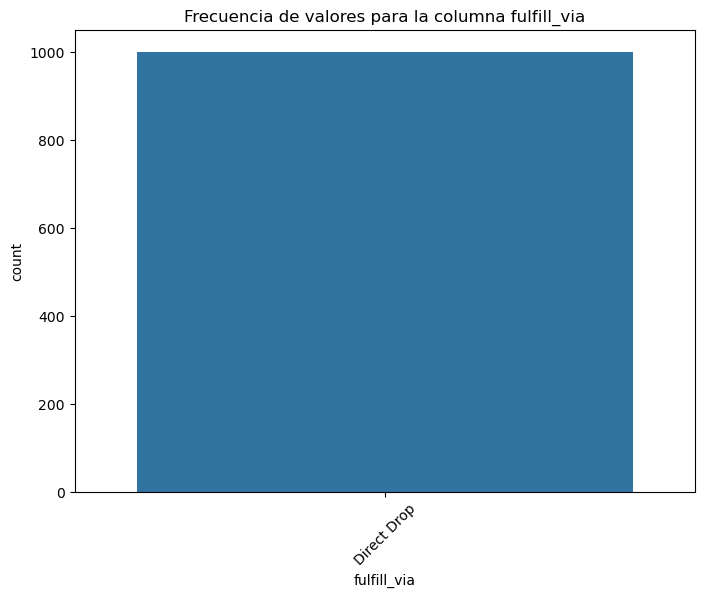

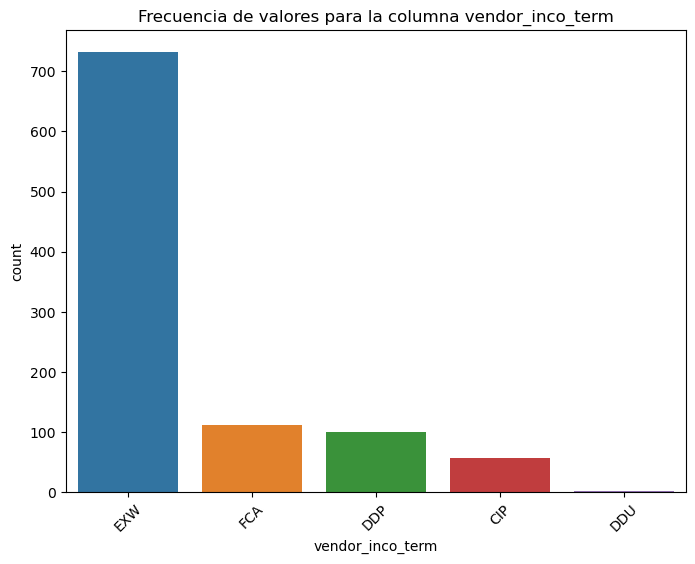

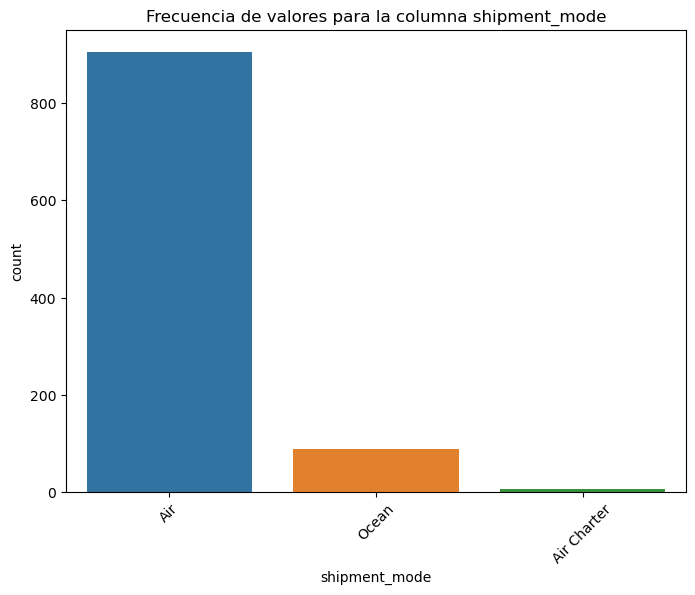

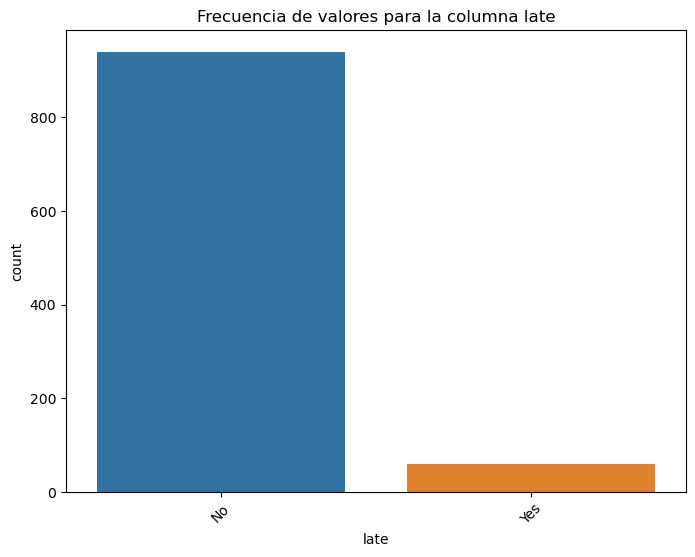

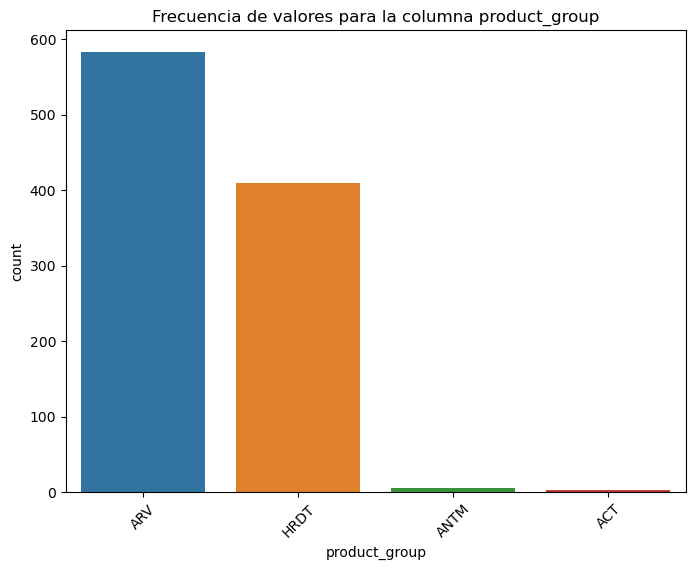

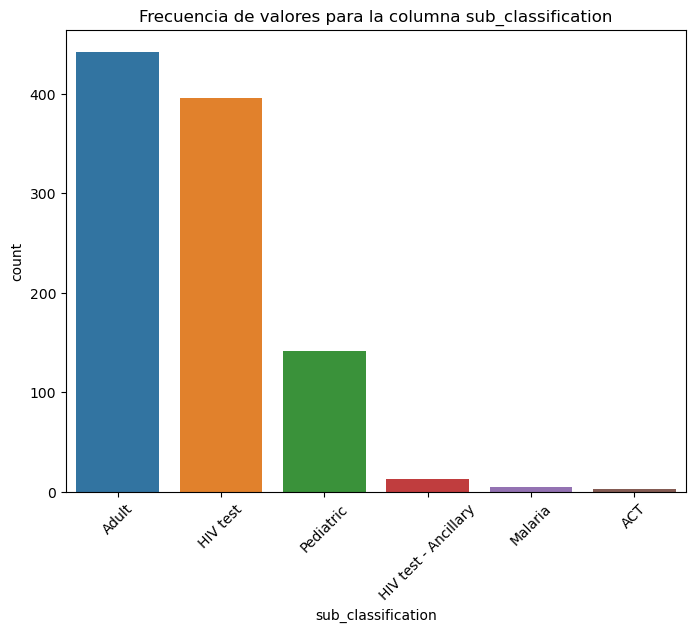

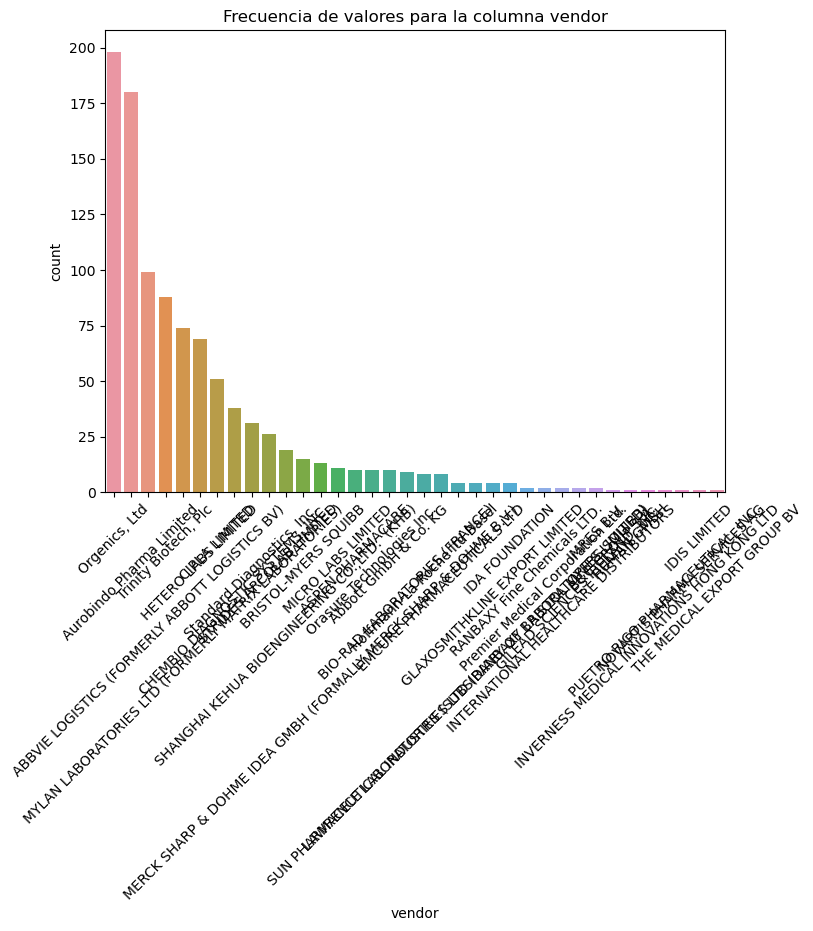

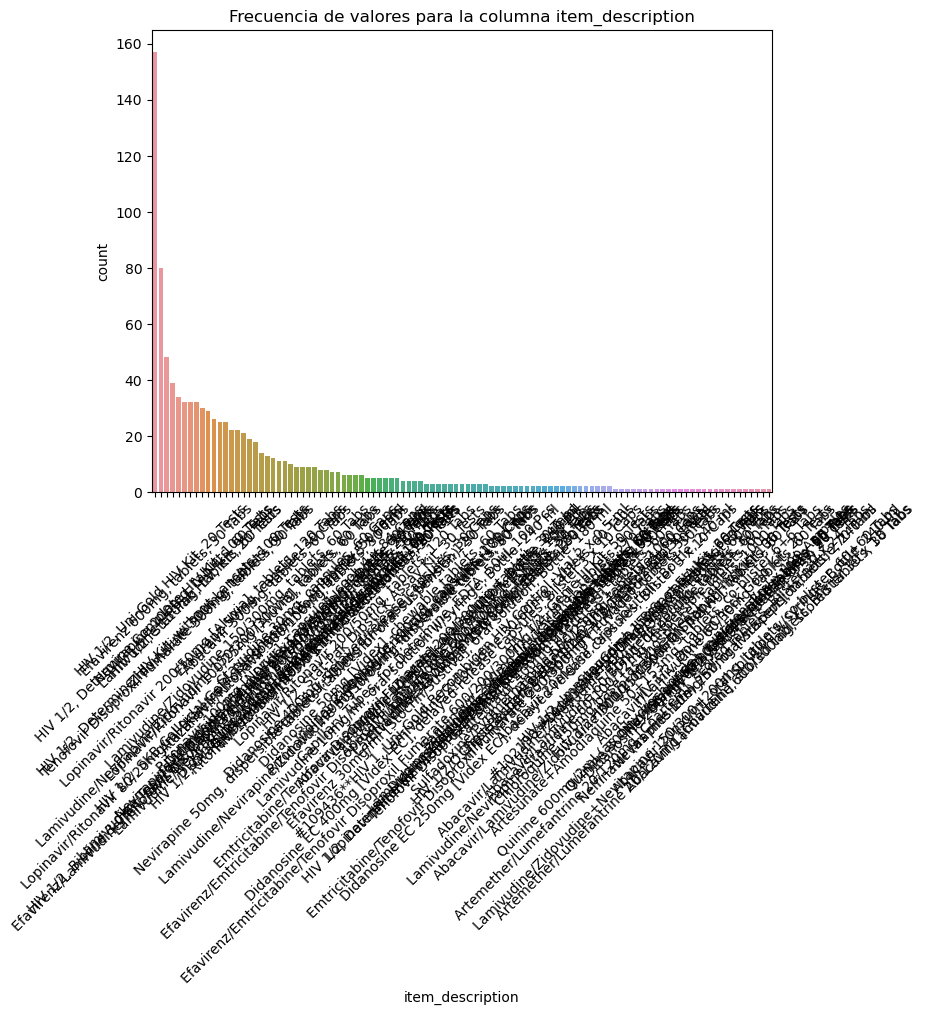

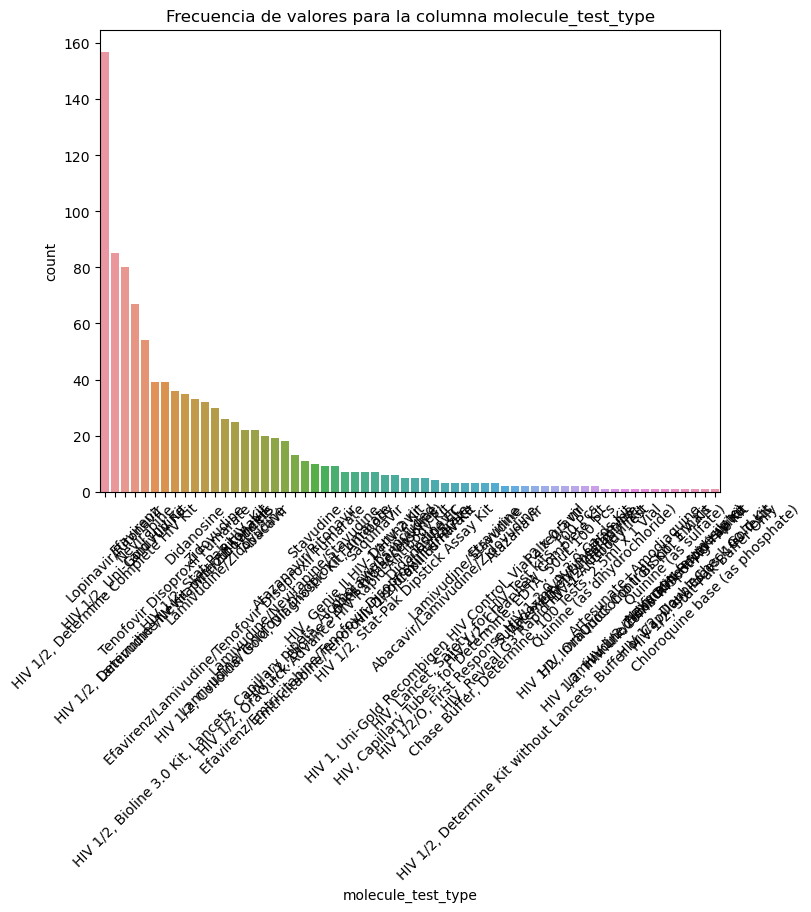

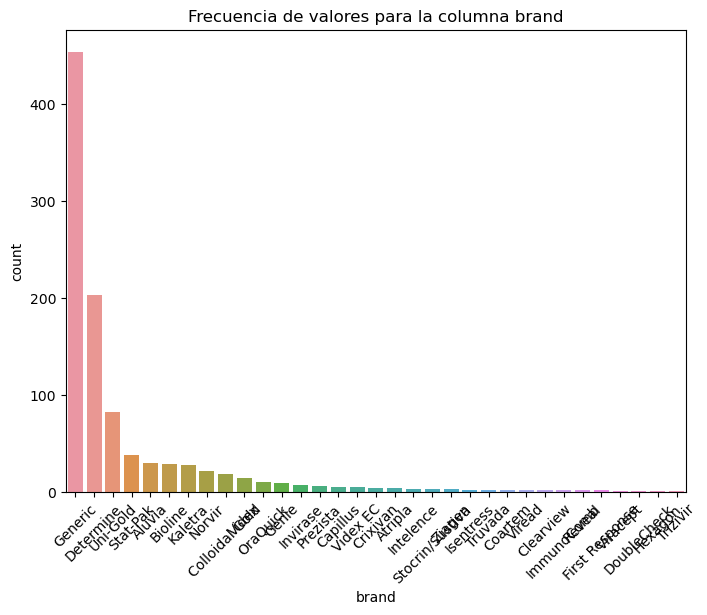

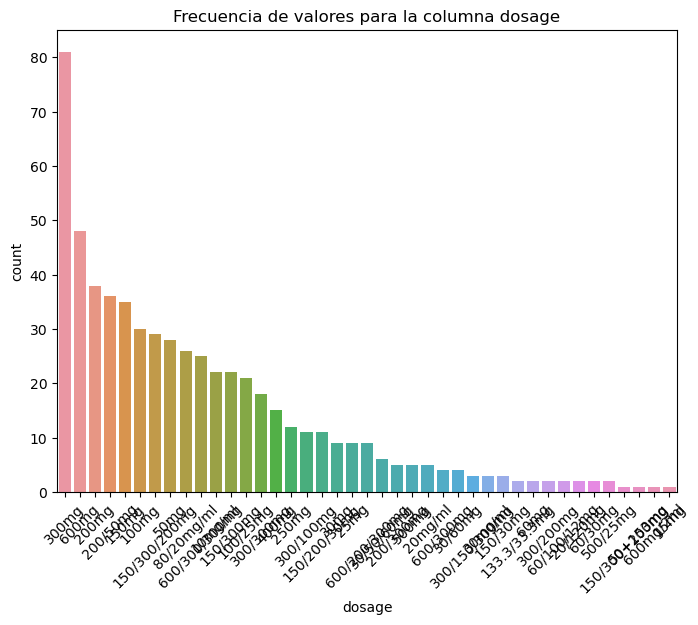

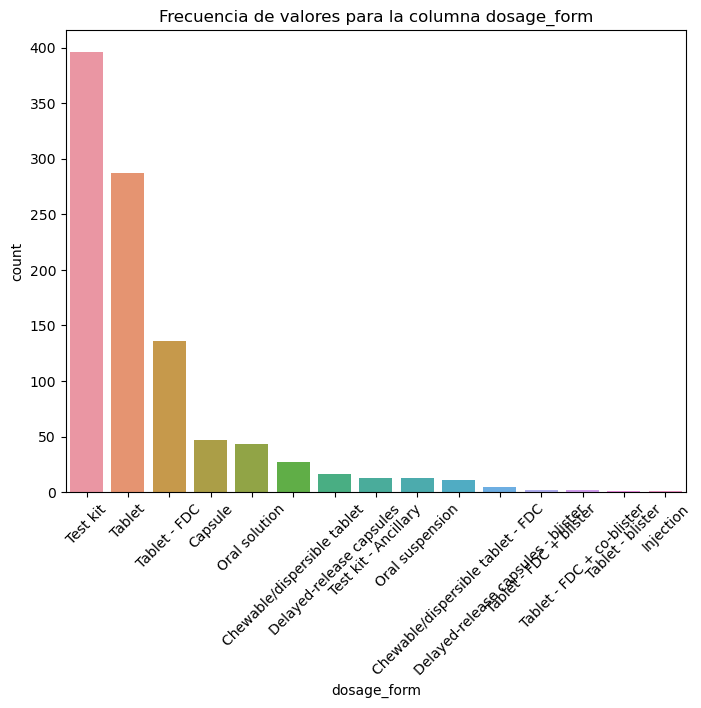

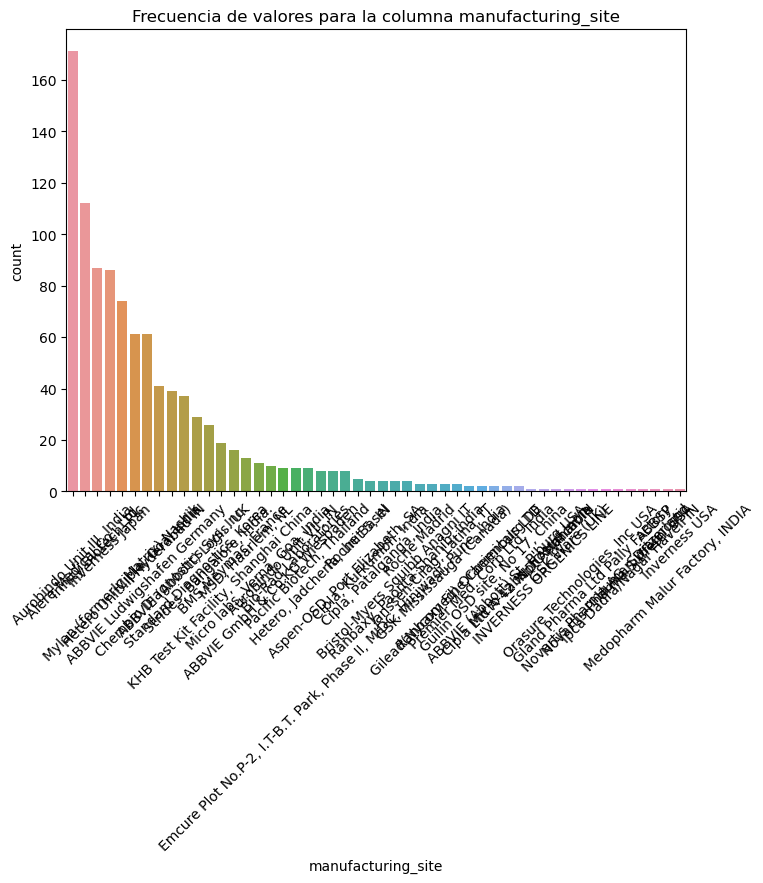

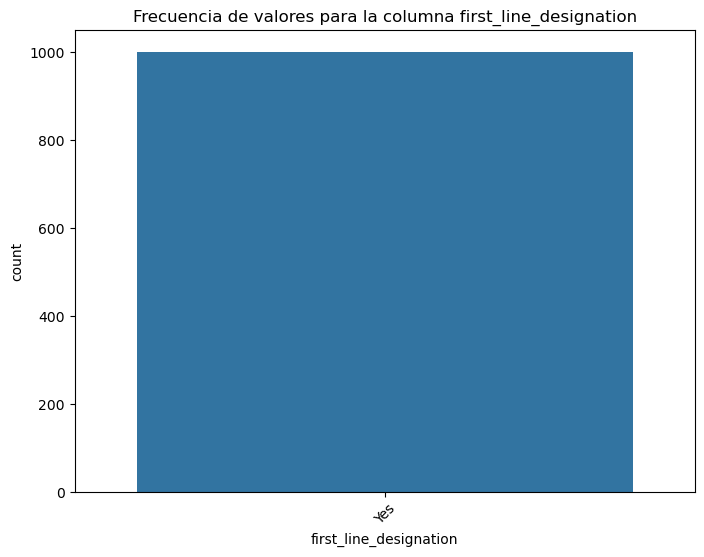

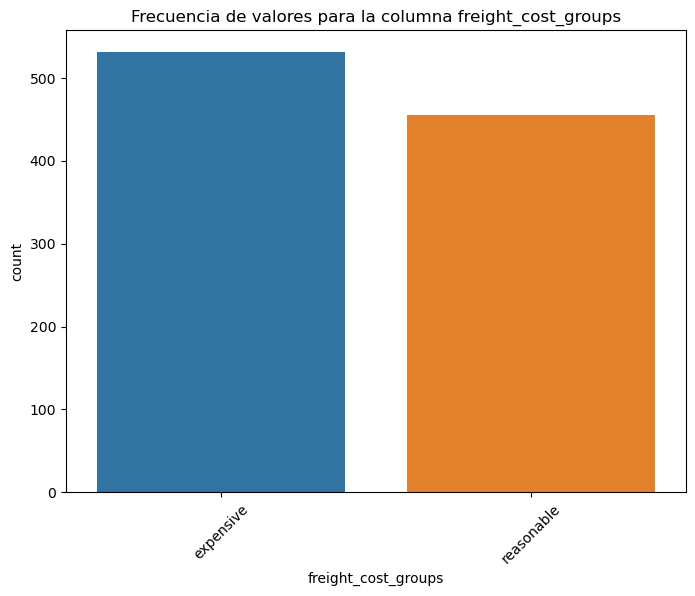

In [19]:
object_columns = df.select_dtypes(include=['object']).columns

# Mostrar la frecuencia de cada valor en las columnas de objeto
for col in object_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Frecuencia de valores para la columna {col}')
    plt.xticks(rotation=45)
    plt.show()

## Paso 4: Muestre las correlaciones (pearson y spearman) que hay en general (valores numéricos), puede utilizar gráficos, ¿cambian mucho los valores entre cada tipo de coeficiente de correlación?

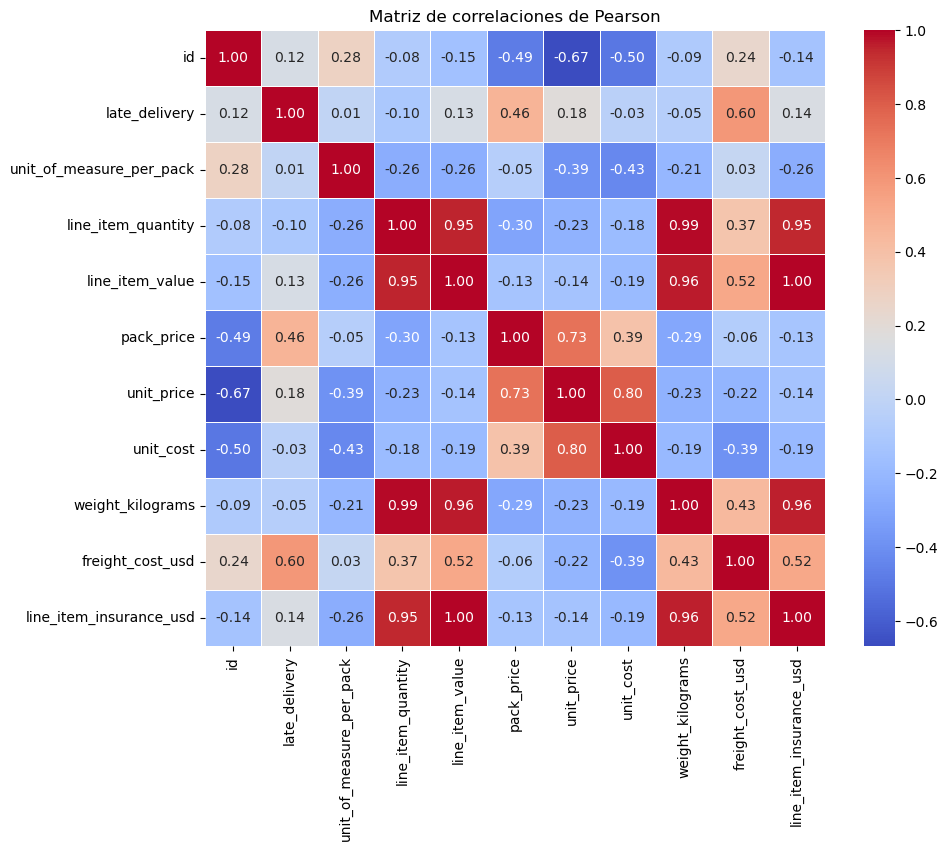

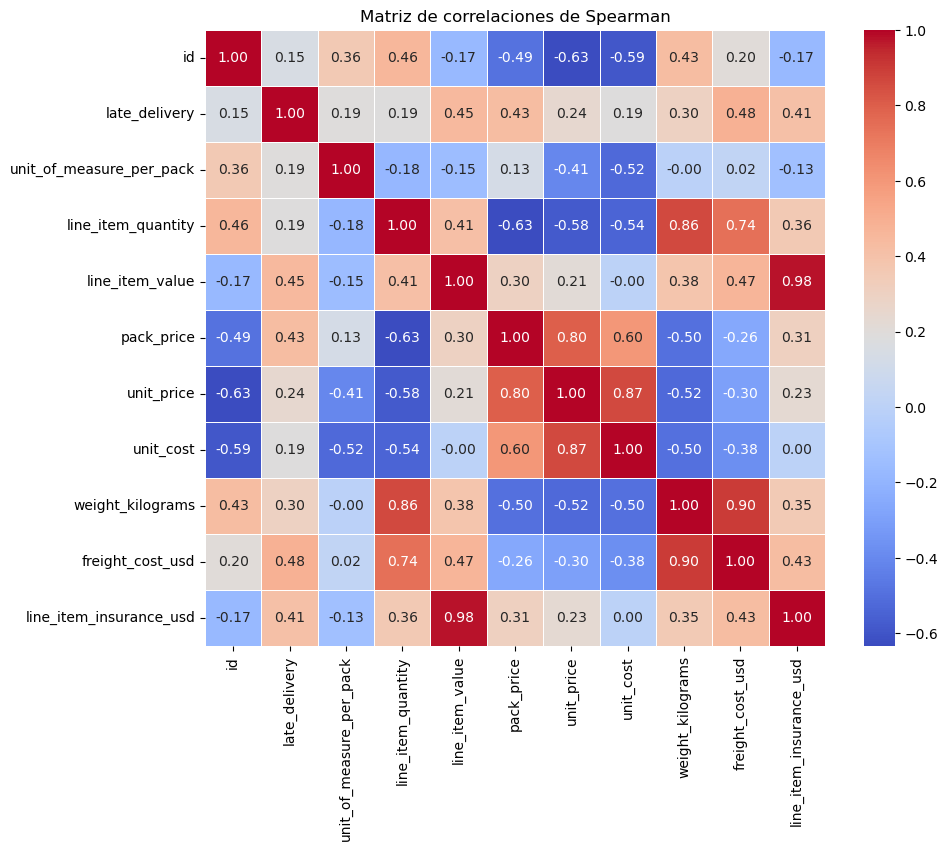

In [21]:
# Removemos las columnas no numéricas o convertirlas a numéricas debido a mi version de pandas
df_numeric = df.select_dtypes(include=[np.number])

# Luego, manejamos los valores faltantes antes de calcular la correlación
df_clean = df_numeric.dropna() 

# Calcular la correlación de Pearson y Spearman
correlation_pearson = df_clean.corr(method='pearson')
correlation_spearman = df_clean.corr(method='spearman')

# Visualizar las correlaciones con gráficos de heatmap
plt.figure(figsize=(10, 8))
plt.title('Matriz de correlaciones de Pearson')
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Matriz de correlaciones de Spearman')
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

cambian

## Paso 5: Muestre los gráficos de distribución de las columnas, elija el tipo de gráfico adecuado para el tipo de variable que está analizando.

In [5]:
# Su código aquí.

# ETAPA 2: Manipulación y tratamiento de los datos.

## Paso 1: Trate los datos nulos, emplee las técnicas que considere más adecuadas de acuerdo al caso específico. Justifique el porqué de la técnicas que escogió.

In [35]:
# comenzamos con la eliminacion de 2 columnas que tienen la mayoria de datos nulos unit_cost y dosage
df_nuevo = df.drop("unit_cost", axis=1)
df_nuevo = df_nuevo.drop("dosage", axis=1)

#ahora seguimos con las siguientes columnas que tienen nulos y son de tipo numerico freight_cost_usd y line_item_insurance_usd
#Usaremos impotacion por mediana debido a que en esas columnas existen muchas anomalias

# Calculamos la mediana
median_freight_cost = df_nuevo['freight_cost_usd'].median()
median_line_item_insurance = df_nuevo['line_item_insurance_usd'].median()

# Imputamos los valores nulos con la mediana
df_nuevo['freight_cost_usd'].fillna(median_freight_cost, inplace=True)
df_nuevo['line_item_insurance_usd'].fillna(median_line_item_insurance, inplace=True)

#ahora solo queda la columna freight_cost_groups que es tipo objeto y utilizaremos imputacion por moda

# Calculamos la moda
mode_freight_cost_groups = df_nuevo['freight_cost_groups'].mode()[0]

# Imputamos los valores nulos con la moda
df_nuevo['freight_cost_groups'].fillna(mode_freight_cost_groups, inplace=True)



In [36]:
# Contabilizamos los valores nulos por columna
df_nuevo.isnull().sum().sort_values(ascending=False)

id                          0
country                     0
freight_cost_groups         0
freight_cost_usd            0
weight_kilograms            0
first_line_designation      0
manufacturing_site          0
unit_price                  0
pack_price                  0
line_item_value             0
line_item_quantity          0
unit_of_measure_per_pack    0
dosage_form                 0
brand                       0
molecule_test_type          0
item_description            0
vendor                      0
sub_classification          0
product_group               0
late                        0
late_delivery               0
shipment_mode               0
vendor_inco_term            0
fulfill_via                 0
managed_by                  0
line_item_insurance_usd     0
dtype: int64

## Paso 2: Convierta en categorías las variables objeto que considere adecuadas, en caso de ser necesario, trate las inconsistencias.

In [7]:
# Su código aquí.

## Paso 3: Utilice el coeficiente de variación para determinar qué columnas (variables) numéricas tienen mayor dispersión.

In [8]:
# Su código aquí.

## Paso 4: De las variables con mayor dispersión, presente su distribución, su gráfico boxplot, y describa a qué se debe que haya tanta dispersión.

In [9]:
# Su código aquí.

## Paso 5: Conteste las siguientes preguntas acorde a la información obtenida de los datos.
#### ¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "line_item_insurance_usd"?
#### ¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "late_delivery"?
#### ¿Cree que alguna otra columna (objeto o categórica) se pueda correlacionar fuertemente con "late_delivery"?, si es así, ¿cuál o cuáles cree que tendrían una correlación fuerte?

# ETAPA 3: Construcción de un modelo de regresión lineal.

## Paso 1: Seleccionar las columnas que estén más correlacionadas con "line_item_insurance_usd" y asígnelas en la variable "X", seleccione la columna "line_item_insurance_usd" y asignela a la variable "y".

In [10]:
# Su código aquí.

## Paso 2: Divida en dos muestras los dos dataframes creados anteriormente (X,y), debe tener una muestra para entrenamiento y otra para pruebas, el tamaño de la muestra de entrenamiento debe ser del 80%, asigne una semilla aleatoria con valor de 2033 para poder brindar reproducibilidad.

In [11]:
# Su código aquí.

## Paso 3: Importe el modelo de regresión lineal (multivariable) de sklearn, entrene el modelo con el set de datos de entrenamiento, posteriormente haga predicciones con el set de pruebas (X_train).

In [12]:
# Su código aquí.

## Paso 4: Evalúe el modelo con la métrica "accuracy_score" y la métrica "f1_score" (ambas disponibles con sklearn).

In [13]:
# Su código aquí.

## Paso 5: Responda.
#### ¿Su modelo fue capaz de realizar predicciones con precisión?
#### ¿A qué cree que se deba el rendimiento de su modelo?
#### Si selecciona todas las variables y las asigna en X, en lugar de las que tienen correlación más fuerte, ¿cree que el modelo mejore o empeore?

# ETAPA 4: Hipótesis.

## Paso 1: Defina la hipótesis nula a partir de la siguiente pregunta:
#### ¿La proporción de entrega tarde ("late_delivery") es mayor a 0.06 (6%)?, asigne el valor de la hipótesis nula a la variable "Ho".
#### Considere un nivel de significación del 5%.

In [14]:
# Su código aquí

## Paso 2: Defina la hipótesis alternativa según la pregunta anterior, solo escríba cómo quedaría y qué tipo de prueba de hipótesis se utilizará.

Su respuesta:

## Paso 3: Haga una distribución bootstrap de la columna "late_delivery" y calcule el error estándar, guárdelo en una variable. El tamaño de la lista de la distribución de boostrap queda a libre elección, muestre un histograma de la distribución bootstrap.

In [15]:
# Su código aquí.

## Paso 4: Calcule la puntuación Z y guárdela en una variable.

In [16]:
# Su código aquí.

## Paso 5: Dependiendo del tipo de prueba, calcule el valor de P (p-value) y diga si puede rechazar (o falla al rechazar) la hipótesis nula.
## Calcule el intervalo de confianza, utilice los cuantiles adecuados dado el nivel de significación establecido previamente.

In [17]:
# Su código aquí.

# ETAPA 5: Publicando el notebook.

## Paso 1: Al igual que con el proyecto anterior, haga un repositorio público en su cuenta de GitHub.

## Paso 2: Suba este archivo jupyter-notebook junto con el archivo de instrucciones y el set de datos.

## Paso 3: Documente apropiadamente el proyecto en el repositorio público, haga uso del archivo "README" que suele crearse.

## Paso 4: Copie el enlace al repositorio y mándelo al entregar la actividad. 
# IMPORTANTE: Al entregar este proyecto, debe entregar este archivo y el enlace a la copia que estará en GitHub, se necesitan de ambas cosas.